<a href="https://colab.research.google.com/github/ranjita782/python-projects/blob/main/jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

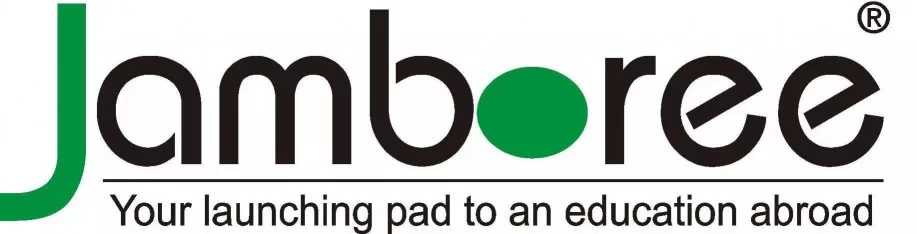

# JAMBOREE EDUCATION

Established in 1993 with a vision to make global education accessible, Jamboree Education has been pioneering international university admissions for 3 decades now.It is India's oldest and leading institute for comprehensive classroom preparation for tests such as the GMAT™, GRE®, SAT®, TOEFL®, and IELTS™. With over 28 centers across India and Nepal, Jamboree provides a consistent curriculum and high teaching standards.
Known as India's most trusted name for education abroad, Jamboree has been pivotal in shaping the careers and dreams of countless students. Initially addressing the lack of information on studying abroad, Jamboree has evolved to become a key player in guiding students through the entire process—from test preparation to university admissions.  

Jamboree stands out for its thorough research and professional approach, making the journey to study abroad smooth and efficient. The institute offers a range of value-added services, including discounted couriers, education loans, and pre-departure orientations, making it a one-stop shop for all study-abroad needs.

What sets Jamboree apart is its expertise in test preparation. By defining a narrow syllabus and ensuring that nothing beyond it appears on the exam, Jamboree has helped students achieve some of the highest scores in the country, including a 790 on the GMAT™, a 340 on the GRE®, and a 1590 on the SAT®.

Over the past three decades, Jamboree has pioneered international university admissions, assisting over 200,000 students in gaining acceptance to prestigious institutions like Harvard, Stanford, MIT, Oxford, Yale, and LBS. Known for its personalized approach, Jamboree ensures that every student receives the individual attention and guidance they need.

From test preparation and interview training to visa applications and post-admission services, Jamboree offers comprehensive support to ease the study abroad process for students.

In [ ]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 38.1MB/s]


In [ ]:
#Header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats.skew
import warnings
warnings.filterwarnings('ignore')
import gdown as gd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2,chi2_contingency,f_oneway,kruskal,shapiro
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
# Import the dataset
data = pd.read_csv('Jamboree.csv')

#1.1 Problem Statement:

As a data scientist/ML engineer at Jamboree, The primary objective is to analyze the provided dataset to uncover the key factors influencing graduate admissions and understand their interrelationships. Additionally, the goal is to develop a predictive regression model that estimates an applicant's probability of admission based on the available features, with a specific focus on the unique perspective of Indian applicants. This analysis and model will help Jamboree provide personalized insights and improve decision-making for students aspiring to join Ivy League colleges.

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Exploratory Data Analysis (EDA):
#2.2 Check the shape of the dataset provided.
data.shape

(500, 9)

In [ ]:
data.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
#2.3 Check the data type of each column
data.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
#2.4 Range of the attributes.
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97



```
GRE Score: Varies from 290 to 340.
TOEFL Score: Varies from 92 to 120.
University Rating: Varies from 1 to 5.
SOP: Varies from 1 to 5.
LOR: Varies from 1 to 5.
CGPA: Varies from 6.80 to 9.92.
Research: Binary, varies between 0 and 1.
Chance of Admit: Varies from 0.34 to 0.97.

```



Yes, normalization could be beneficial here because the ranges of the columns are not uniform. We see here GRE scores range from 290 to 340, while CGPA ranges from 6.80 to 9.92, and the "Research" column is binary. Normalization will bring these different ranges to a common scale, which can improve the performance during testing.Normalizing the data ensures that no single feature disproportionately influences the model due to its larger range.

**#2.5 Statistical summary of the entire dataset**

The dataset has **500** entries with the following columns.The dataset contains **9** columns, with mixed data types: **int64** and **float64**. Dataset does not contain any null values and all are numeric values.
Numerical columns :Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit.

Details of Numerical columns:
The dataset of 500 student profiles shows high academic achievement and strong application credentials. The average GRE score is 316.47, while the average TOEFL score is 107.19. University ratings have a mean of 3.11, with SOP and LOR scores averaging 3.37 and 3.48, respectively. The mean CGPA is 8.58.Approximately 56% of students have research experience.The chance of admission averages 0.72.GRE scores range from 290 to 340, and TOEFL scores from 92 to 120. The standard deviations for GRE and TOEFL are 11.30 and 6.08, respectively. The range of CGPA is from 6.8 to 9.92.

In [ ]:
#2.1 Drop any irrelevant column present in the dataset.
data = data.drop(columns=['Serial No.'])
#Check the shape of the dataset after dropping the column.
data.shape

(500, 8)

The dataset contains a unique row identifier column named "**Serial No.**".

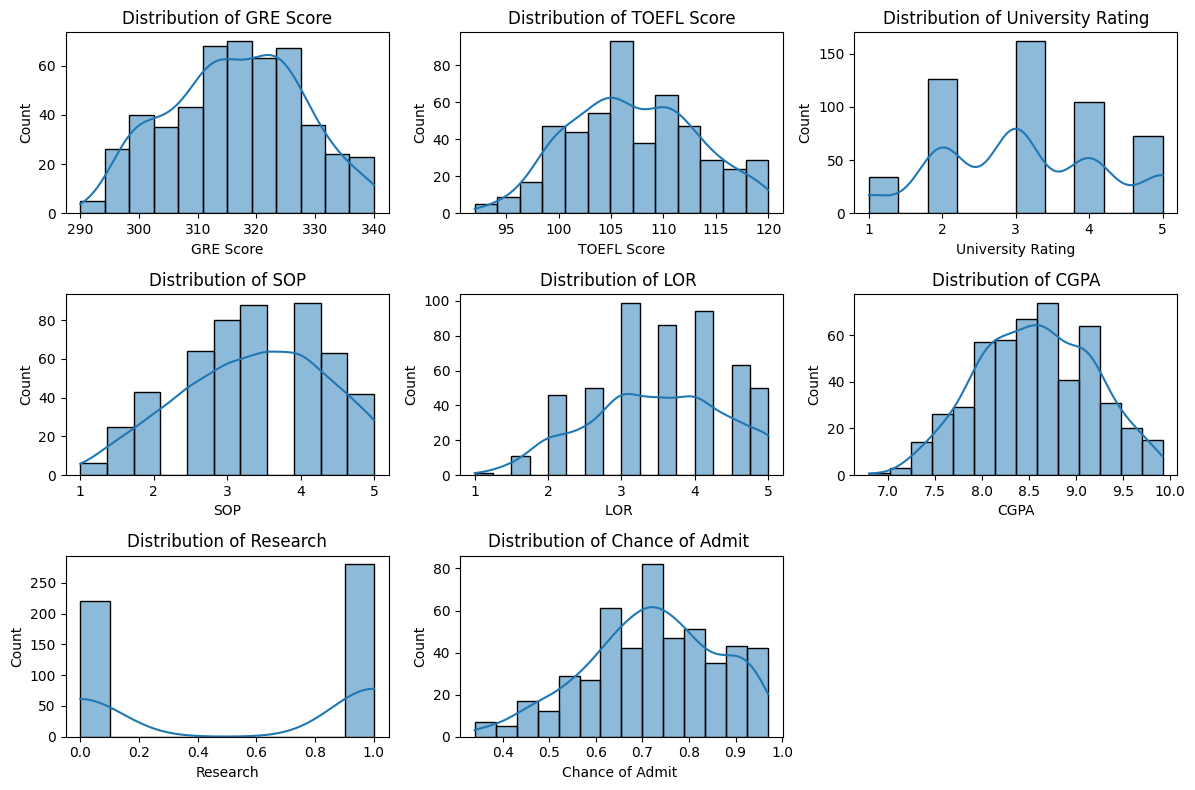

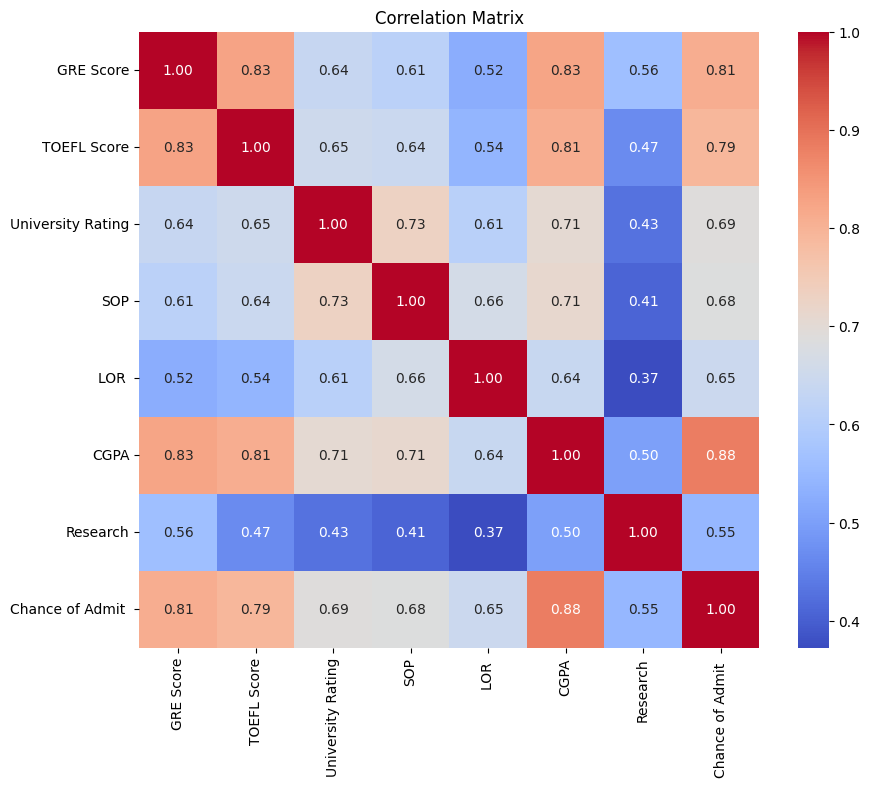

In [ ]:
#3 Non-graphical and graphical analysis of variables.
#3.1 Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights from histplots**

GRE and TOEFL Scores: Both GRE and TOEFL scores show a bell-shaped distribution, indicating that most students score around the average.

University Rating, SOP, and LOR: These features exhibit a somewhat uniform distribution with peaks around the mid values.

CGPA: The distribution is slightly skewed to the right, suggesting most students have a higher CGPA.

Research Experience: It's a binary variable with a slight majority of students having research experience.

Chance of Admit: The chance of admission is fairly spread out but with a concentration towards the higher values.

**Statistics:**
```
GRE Score: Mean of 316.47, Std Dev of 11.30, ranging from 290 to 340.

TOEFL Score: Mean of 107.19, Std Dev of 6.08, ranging from 92 to 120.

University Rating: Mean of 3.11, Std Dev of 1.14, ranging from 1 to 5.

SOP: Mean of 3.37, Std Dev of 0.99, ranging from 1 to 5.

LOR: Mean of 3.48, Std Dev of 0.93, ranging from 1 to 5.

CGPA: Mean of 8.58, Std Dev of 0.60, ranging from 6.8 to 9.92.

Research: Mean of 0.56, Std Dev of 0.50, indicating a slight majority have research experience.

Chance of Admit: Mean of 0.72, Std Dev of 0.14, ranging from 0.34 to 0.97.
```

**Correlation Analysis:**

```
High Correlation with Chance of Admit:
CGPA: 0.88
GRE Score: 0.81
TOEFL Score: 0.79
University Rating: 0.69
SOP: 0.68
LOR: 0.65
Moderate Correlation with Chance of Admit:
Research: 0.55
```

**Insights from heat map:**

These correlations indicate that CGPA, GRE score, TOEFL score, University Rating, SOP,** and LOR **have a strong influence on the chance of admission, while research experience has a moderate influence. This insight can help Jamboree focus on these key areas when advising students on how to improve their chances of admission to graduate programs.


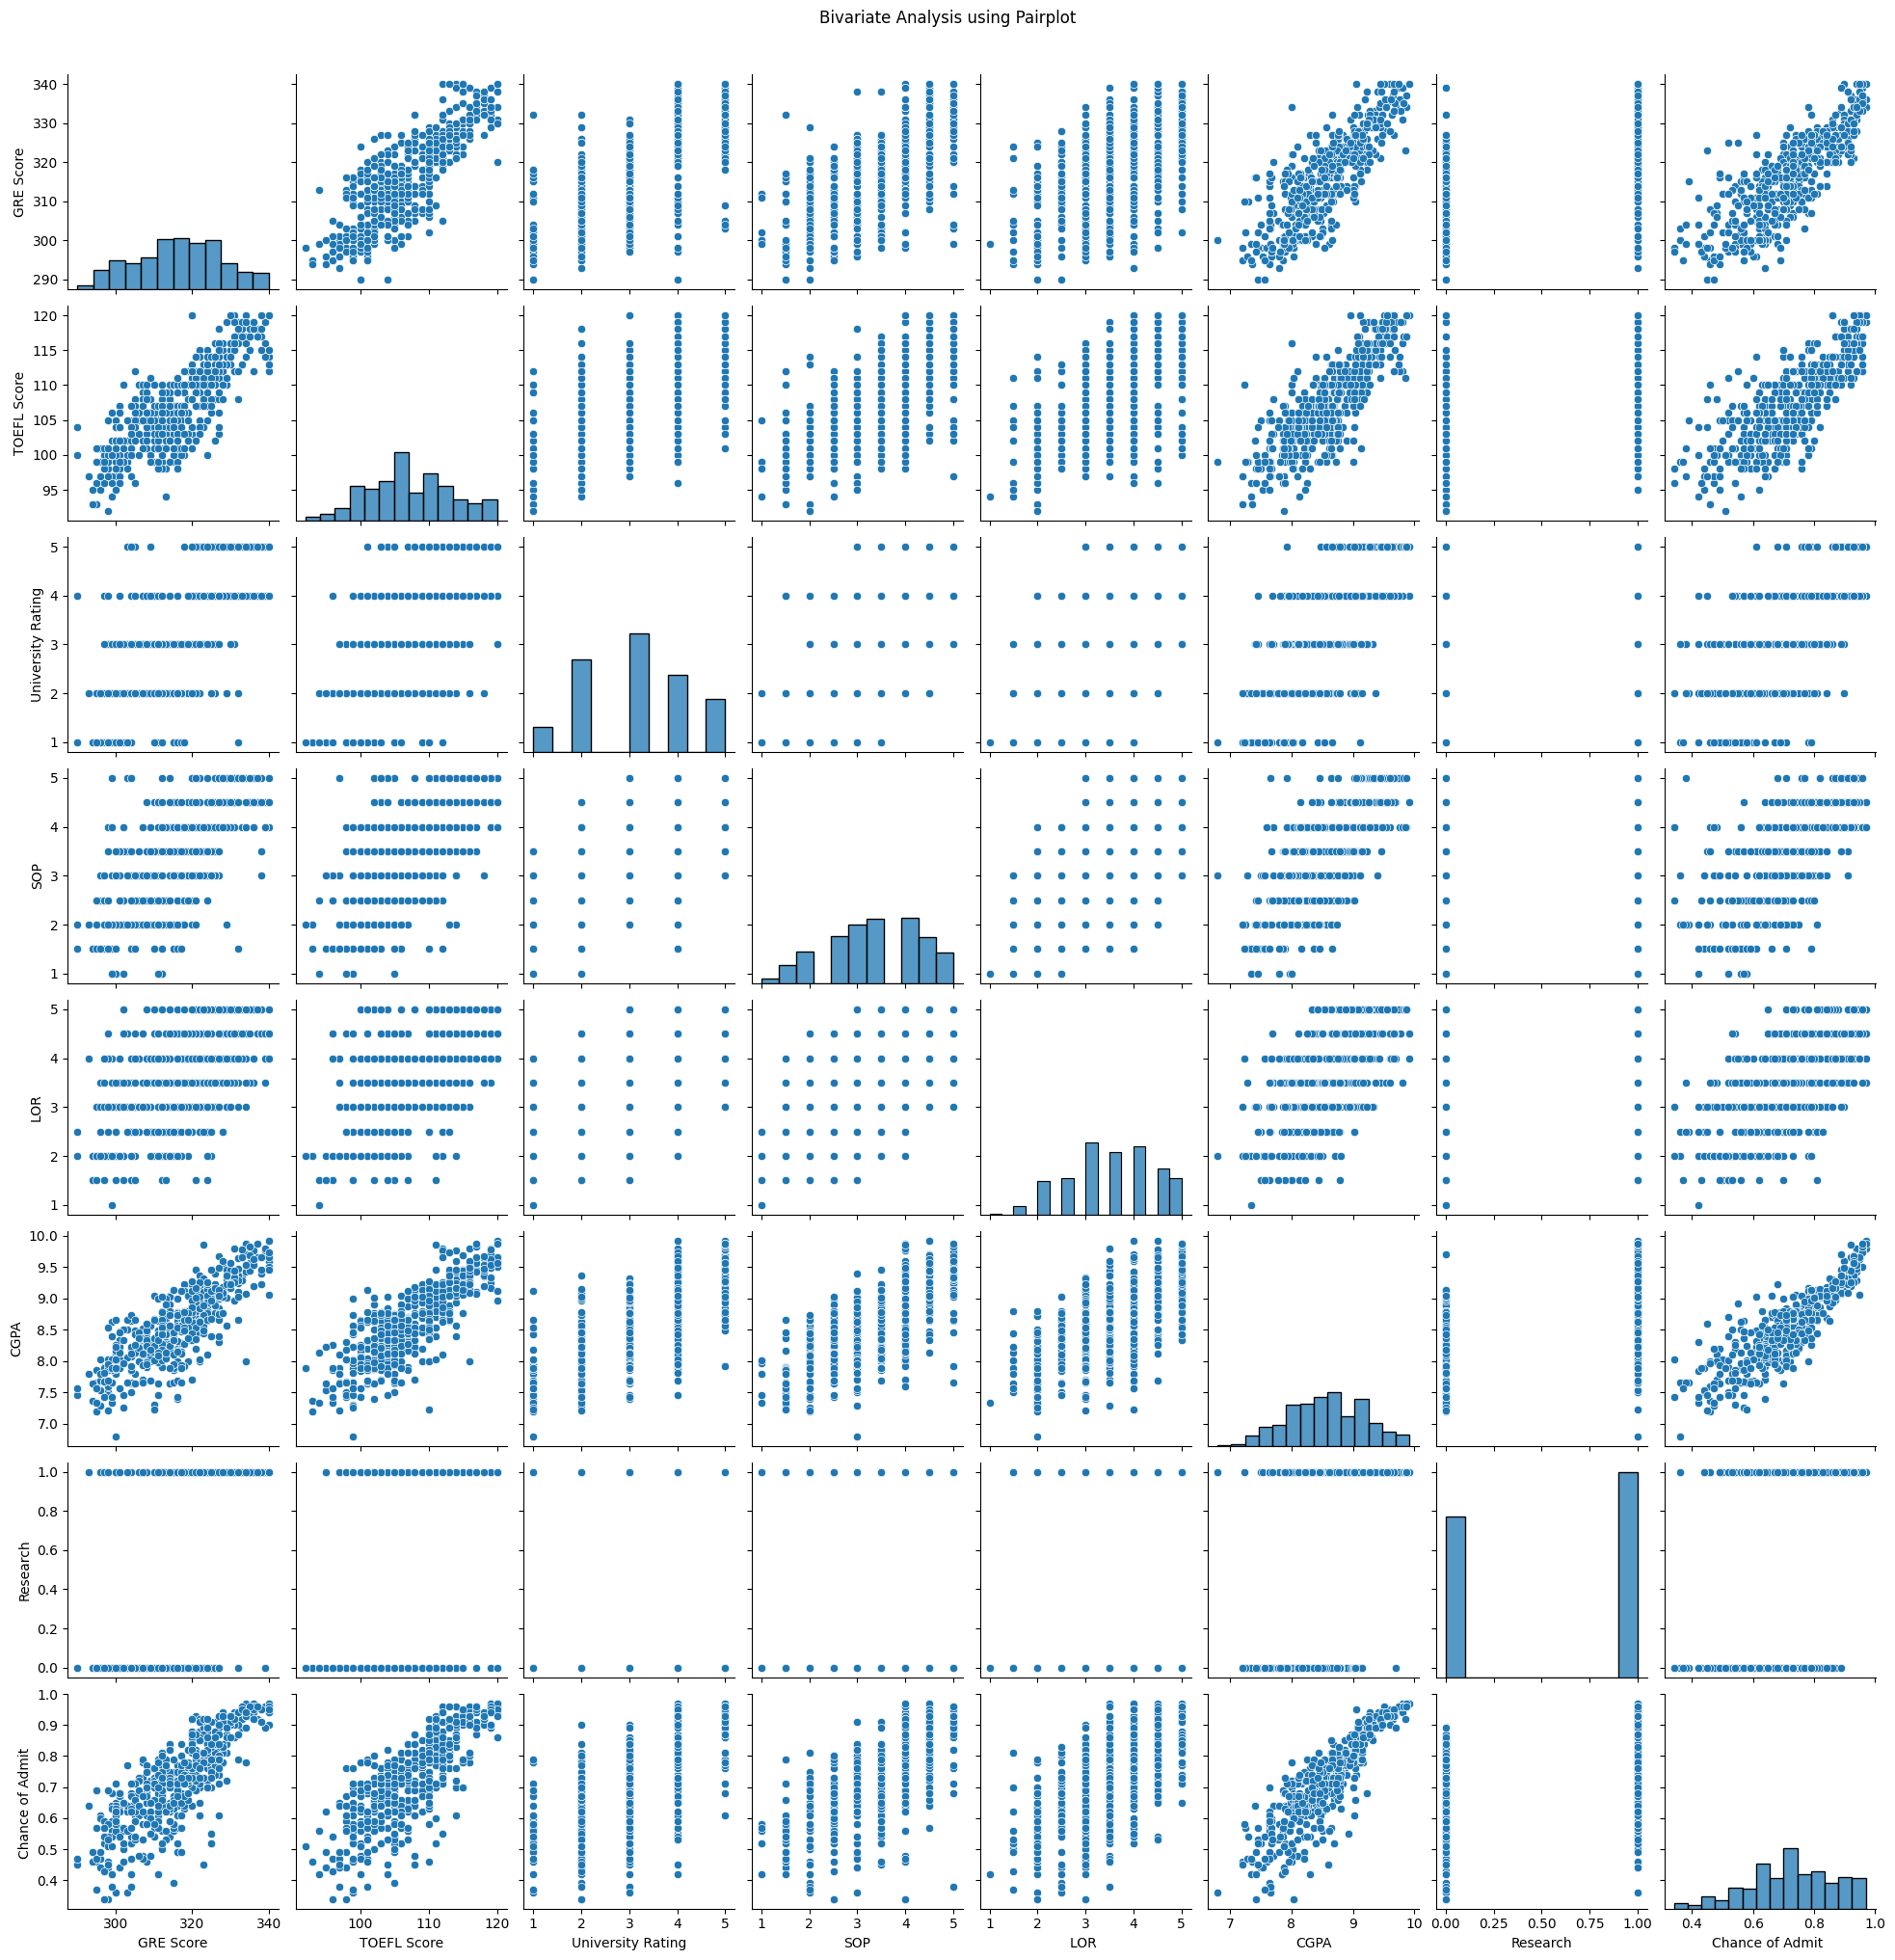

In [ ]:
#3.3 Bivariate Analysis
#3.2.a Pairplot to analyze bivariate relationships
pairplot = sns.pairplot(data)
pairplot.fig.suptitle("Bivariate Analysis using Pairplot", y=1.02)
plt.show()

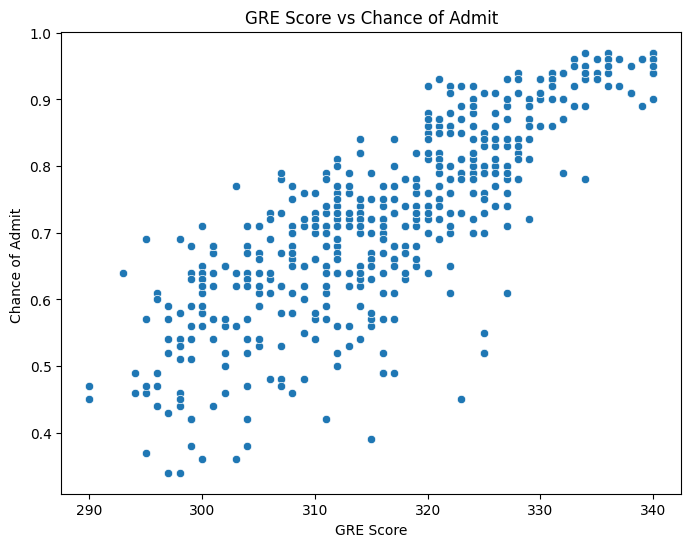

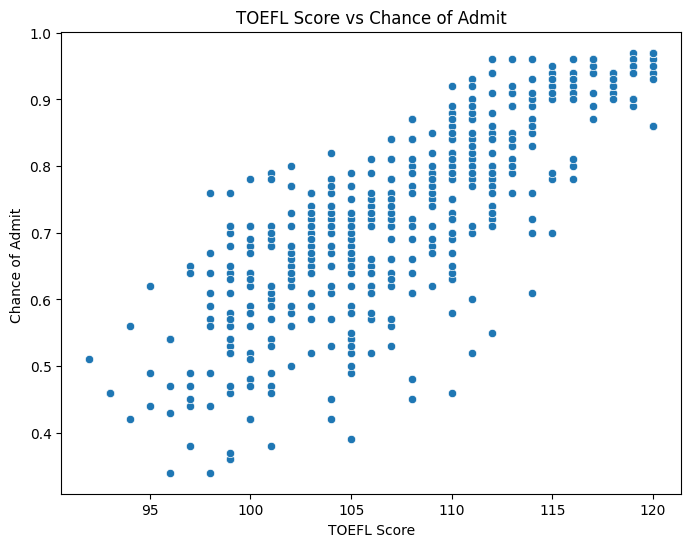

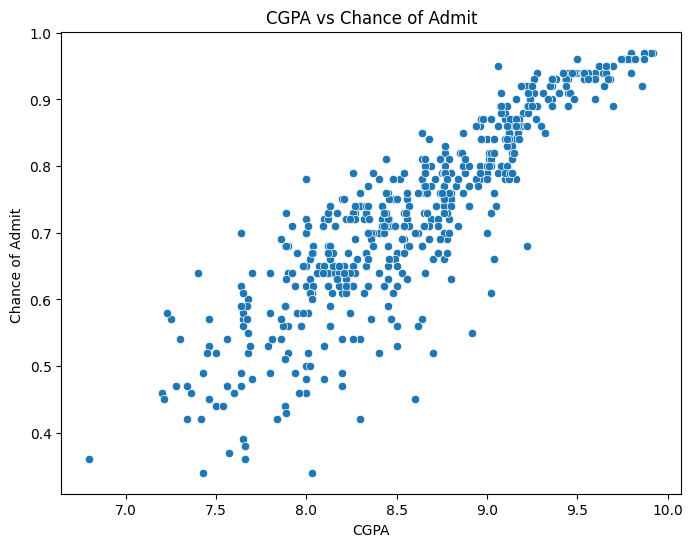

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#3.2.b Scatter plot for GRE Score vs Chance of Admit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='GRE Score', y='Chance of Admit ')
plt.title('GRE Score vs Chance of Admit')
plt.show()

# Scatter plot for TOEFL Score vs Chance of Admit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TOEFL Score', y='Chance of Admit ')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

# Scatter plot for CGPA vs Chance of Admit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CGPA', y='Chance of Admit ')
plt.title('CGPA vs Chance of Admit')
plt.show()




**Scatter Plot Interpretation:**

---
Scatterplots display the direction, strength, and linearity of the relationship between two variables. A positive trend indicating higher TOEFL scores,higher TOEFL score and higher CGPA correlate with higher chances of admission.
Scatter plots help to visualize and analyze the relationships between the independent variables (**GRE Score, TOEFL Score, CGPA**) and the dependent variable (**Chance of Admit**). In all the three cases, the following pattern repeats.

Form: The plot shows a linear form, indicating a straight-line relationship between GRE Score and Chance of Admit,TOEFL Score and Chance of Admit and CGPA Score and Chance of Admit.

Direction: The direction is positive, meaning that as the GRE Score,TOEFL Score and CGPA Score increases, the Chance of Admit also tends to increase.

Strength: The relationship appears to be moderately strong, as the points are reasonably close to the line of best fit but not perfectly aligned.

Outliers: There may be a few outliers, which are data points that do not fit the general pattern of the data. These are points that are far from the line of best fit.

**Pair Plot Interpretation:**

---



The pair plot will show scatter plots for all variable pairs along with histograms for individual variables. Look for trends and patterns in the scatter plots to understand relationships between different variables.

In [ ]:
#4 Perform data preprocessing.
#4.2 Check for missing values
missing_values = data.isnull().sum()
missing_values



,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
#4.1 Check for duplicate records
duplicates = data.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")
data = data.drop_duplicates()


Number of duplicate records: 0


Missing as well as Duplicate values are null.

In [ ]:
#4.3 Function to detect and handle outliers using IQR method
def handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# List of numerical columns to check for outliers
numerical_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Handle outliers for each numerical column
for column in numerical_columns:
    handle_outliers(column)


In [ ]:
#5.1 Define features (independent variables)
X = data.drop(columns=['Chance of Admit '])

# Calculate the correlation matrix
correlation_matrix = X.corr()

correlation_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524377,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.540630,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608241,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.662848,0.712154,0.408116
LOR,0.524377,0.540630,0.608241,0.662848,1.000000,0.636923,0.372280
CGPA,0.825878,0.810574,0.705254,0.712154,0.636923,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372280,0.501311,1.000000


In [ ]:
data
print(data.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


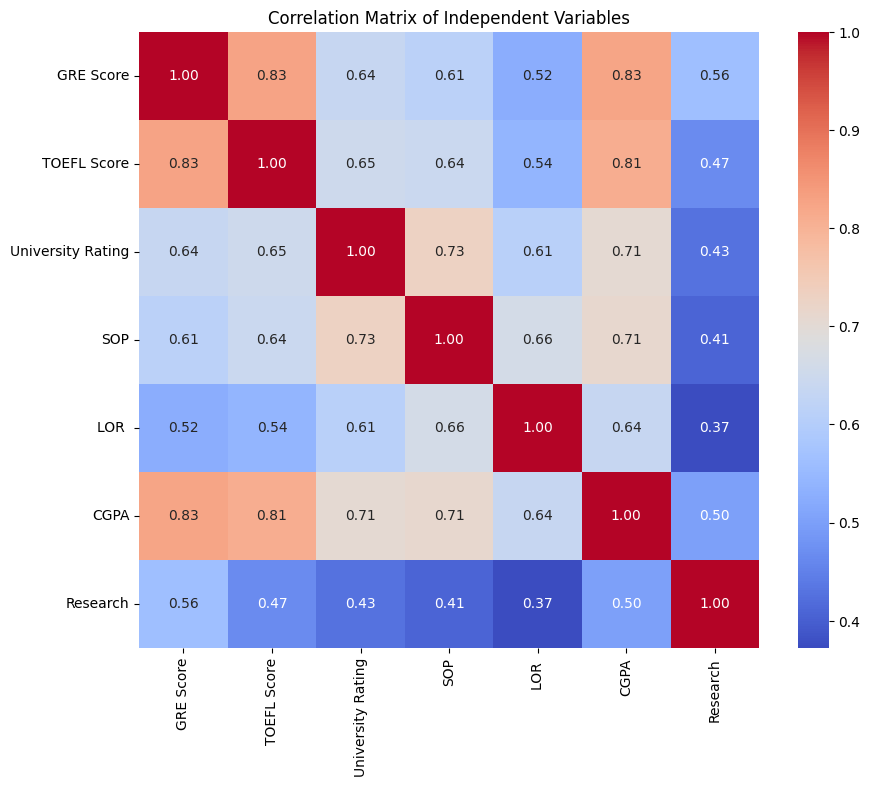

In [ ]:
#5.2 Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Independent Variables')
plt.show()

In [ ]:
#5.3 Identify features with high correlation (>0.90)
high_correlation_pairs = np.where(correlation_matrix > 0.90)
high_correlation_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                          for x, y in zip(*high_correlation_pairs) if x != y and x < y]

print("Highly Correlated Pairs (>0.90):", high_correlation_pairs)

# Drop one feature from each pair of highly correlated features
features_to_drop = set(pair[1] for pair in high_correlation_pairs)
X_dropped = X.drop(columns=features_to_drop)

print("Features dropped:", features_to_drop)
print("Remaining features:", X_dropped.columns)


Highly Correlated Pairs (>0.90): []
Features dropped: set()
Remaining features: Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


In this dataset, none of the correlation pairs are highly associated with each other. But it is coded to check as it was suggested in the question.

#6. Data Modeling

#6.1 Encode Categorical Variables
For this dataset, all the column values are already numerical, so no categorical encoding is necessary. If there were any categorical columns, we would use pd.get_dummies() or LabelEncoder.

In [ ]:
#6.2 The train-test split

from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['Chance of Admit '],axis=1)
y = data['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [ ]:
#6.3 Standardisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.920
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.664
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0,0.600
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0,0.728
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0,0.488


In [ ]:
#7. Linear regression model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled data
X_train_scaled.shape, X_test_scaled.shape

# Train the model
model.fit(X_train_scaled, y_train)

#7.2  Get the model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Predict on training data
y_pred_train = model.predict(X_train_scaled)

# Predict on test data
y_pred_test = model.predict(X_test_scaled)


Model Coefficients: [0.02664015 0.018191   0.00293201 0.00185611 0.01583785 0.06757604
 0.01193456]
Model Intercept: 0.7242000000000001


Model coefficients with column names:

```
GRE Score: 0.0266
TOEFL Score: 0.0182
University Rating: 0.0029
SOP: 0.0019
LOR: 0.0158
CGPA: 0.0676
Research: 0.0119
```



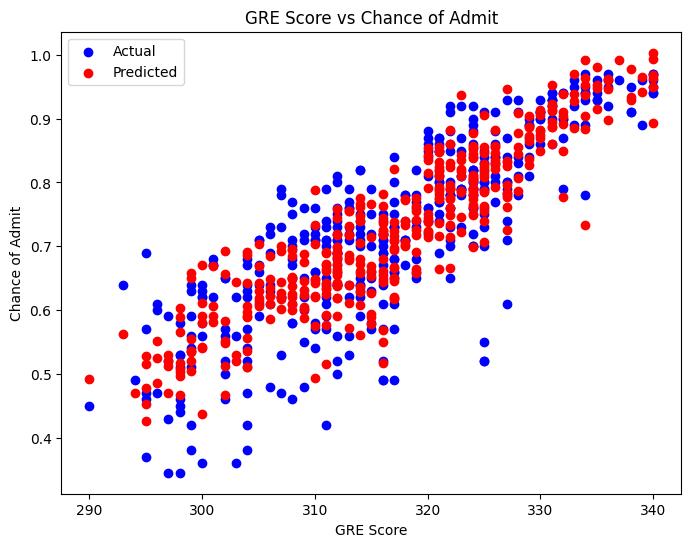

In [ ]:
# Scatter plot for GRE Score vs Chance of Admit
plt.figure(figsize=(8, 6))
plt.scatter(X_train['GRE Score'], y_train, color='blue', label='Actual')
plt.scatter(X_train['GRE Score'], y_pred_train, color='red', label='Predicted')
plt.title('GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()


In [ ]:
# Verify the shapes of the scaled data
print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (400, 7)
Testing data shape: (100, 7)


In [ ]:
#7.1 Build the Linear Regression model.
# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.4
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.54e-142
Time:                        04:47:04   Log-Likelihood:                 562.41
No. Observations:                 400   AIC:                            -1109.
Df Residuals:                     392   BIC:                            -1077.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.749      0.0

**#7.2 INSIGHTS**


```
Model Statistics
Dependent Variable: Chance of Admit
R-squared: 0.829
Adjusted R-squared: 0.825
F-statistic: 236.4
Prob (F-statistic): 1.20e-144
```



**Coefficients:**


```
const: Coefficient = 0.7242, p-value = 0.000
x1: Coefficient = 0.0125, p-value = 0.000
x2: Coefficient = 0.0272, p-value = 0.000
x3: Coefficient = 0.0209, p-value = 0.000
x4: Coefficient = 0.0030, p-value = 0.523
x5: Coefficient = 0.0042, p-value = 0.399
x6: Coefficient = 0.0138, p-value = 0.001
x7: Coefficient = 0.0655, p-value = 0.000
x8: Coefficient = 0.0111, p-value = 0.002
```


**Interpretation:**  
R-squared (0.829): This indicates that approximately 82.9% of the variance in the Chance of Admit is explained by the model. This is a high R-squared value, suggesting a strong model fit.

Adjusted R-squared (0.825): This value adjusts the R-squared for the number of predictors in the model. It is slightly lower than the R-squared, but still indicates a strong model fit.

F-statistic (236.4) and Prob (F-statistic) (1.20e-144): The F-statistic tests the overall significance of the model. The extremely low p-value (much less than 0.05) indicates that the model is statistically significant and that at least one of the predictors is significantly related to the dependent variable.

**Coefficients:**

const (0.7242): The intercept of the model. When all predictors are zero, the Chance of Admit is 0.7242.
x1, x2, x3, x6, x7, x8: These variables have significant p-values (less than 0.05), indicating that they are significantly associated with the Chance of Admit.
x4 and x5: These variables have high p-values (greater than 0.05), indicating that they are not significantly associated with the Chance of Admit.
Omnibus (63.061) and Prob (Omnibus) (0.000): The Omnibus test indicates that the residuals are not normally distributed (p-value < 0.05). This might suggest that there are some model assumptions violations.

Durbin-Watson (2.062): This statistic tests for the presence of autocorrelation in the residuals. A value close to 2 suggests no autocorrelation, which is a good sign for the model.

Jarque-Bera (112.681) and Prob (JB) (3.40e-25): These tests also indicate that the residuals are not normally distributed (p-value < 0.05), which is consistent with the Omnibus test result.

Skew (-0.907) and Kurtosis (4.863): These values suggest that the residuals are moderately skewed and have higher kurtosis than a normal distribution.

**Recommendations:**

Dropping Non-significant Variables:

Consider dropping x4 and x5 as they have high p-values (> 0.05) and re-train the model.
Check Model Assumptions: Given the non-normality of residuals, consider applying transformations to the data or using robust regression methods.
Further Validation: Validate the model using cross-validation or hold-out validation to ensure its generalizability.

Hint:
○ Use Linear Regression from Statsmodel library to create a model and comment
on the model statistics.
○ Also, display model coefficients with column names.
○ Drop columns with p-value > 0.05 (if any) and re-train the model.

In [ ]:
#6.3 Feature Scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
# Define the target variable
y = data['Chance of Admit ']

# Define the feature set
X = data.drop('Chance of Admit ', axis=1)
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Add a constant to the model (for the intercept term)
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     265.5
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.73e-144
Time:                        04:51:57   Log-Likelihood:                 371.88
No. Observations:                 400   AIC:                            -727.8
Df Residuals:                     392   BIC:                            -695.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5975      0.005    123.870      0.0

In [ ]:
#7.3  Drop columns with p-value > 0.05 (if any) and re-train the model

original_feature_names = ['const'] + list(X.columns)

# Identify features with p-value > 0.05
high_pval_features = model_sm.pvalues[model_sm.pvalues > 0.05].index

# Map the high p-value feature indices back to the original feature names
high_pval_feature_names = [original_feature_names[int(f[1:])] for f in high_pval_features if f != 'const']

# Drop these features
X_train_scaled_dropped = pd.DataFrame(X_train_scaled_const, columns=original_feature_names).drop(columns=high_pval_feature_names).values
X_test_scaled_dropped = sm.add_constant(X_test_scaled)
X_test_scaled_dropped = pd.DataFrame(X_test_scaled_dropped, columns=original_feature_names).drop(columns=high_pval_feature_names).values

# Re-fit the model without the high p-value features
model_sm_dropped = sm.OLS(y_train, X_train_scaled_dropped).fit()

# Print the summary of the new model
print(model_sm_dropped.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     454.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.19e-146
Time:                        04:52:01   Log-Likelihood:                 367.12
No. Observations:                 400   AIC:                            -724.2
Df Residuals:                     395   BIC:                            -704.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5975      0.005    122.872      0.0

In [ ]:
#8 Assumptions of linear regression
#8.1 Multicollinearity (using VIF method)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the model (for the intercept term)
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for the initial set of features
X_train_scaled_const_df = pd.DataFrame(X_train_scaled_const, columns=['const'] + list(X.columns))
vif_df = calculate_vif(X_train_scaled_const_df.drop(columns='const'))
print(vif_df)

           variables       VIF
0          GRE Score  4.456206
1        TOEFL Score  4.016212
2  University Rating  2.534739
3                SOP  2.843468
4               LOR   1.996864
5               CGPA  4.859688
6           Research  1.511962


In [ ]:
#8.1.a Variables are dropped one-by-one till none has a VIF>5.
while vif_df['VIF'].max() > 5:
    high_vif_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'variables']
    X_train_scaled_const_df = X_train_scaled_const_df.drop(columns=high_vif_feature)
    vif_df = calculate_vif(X_train_scaled_const_df.drop(columns='const'))
    print(vif_df)

# Prepare the final set of features for modeling
X_train_final = X_train_scaled_const_df.values
X_test_final = sm.add_constant(X_test_scaled)
X_test_final = pd.DataFrame(X_test_final, columns=['const'] + list(X.columns)).drop(columns=high_pval_feature_names).values


In [ ]:
#8.2 Mean of residuals calculated
model_final = sm.OLS(y_train, X_train_final).fit()

# Calculate residuals
residuals = model_final.resid

# Check the mean of residuals
mean_residuals = residuals.mean()
print(f"Mean of residuals: {mean_residuals}")


Mean of residuals: -3.7206349112750557e-16


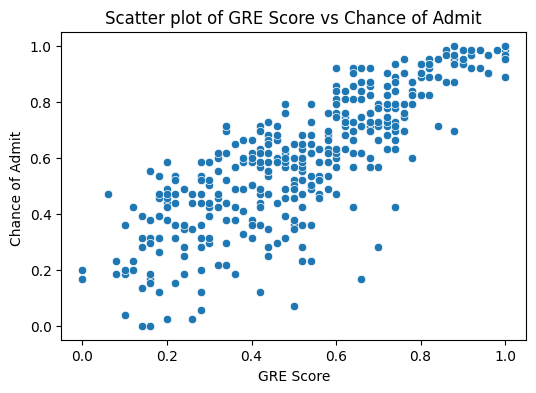

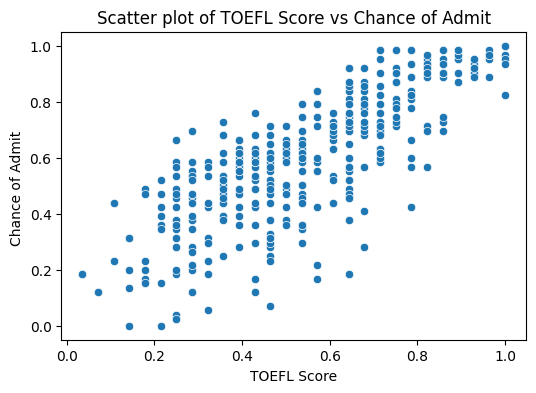

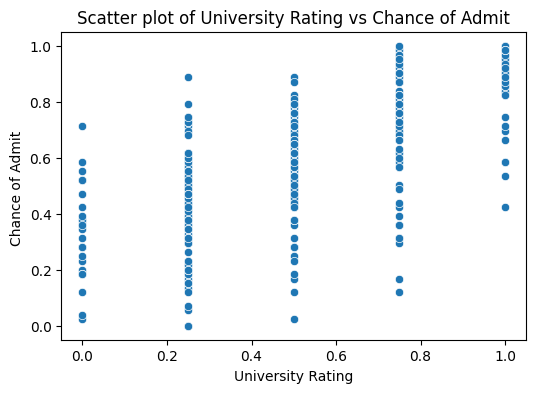

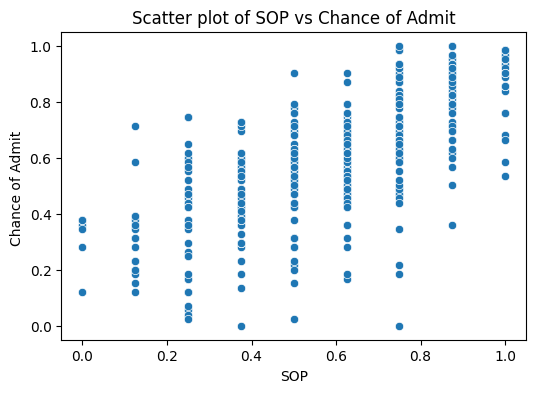

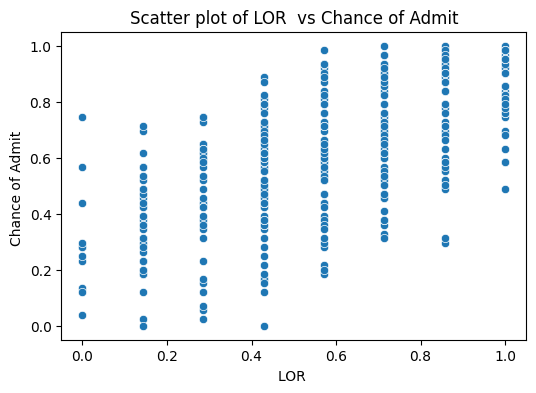

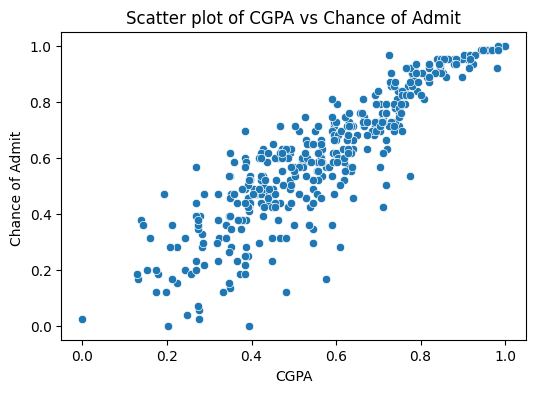

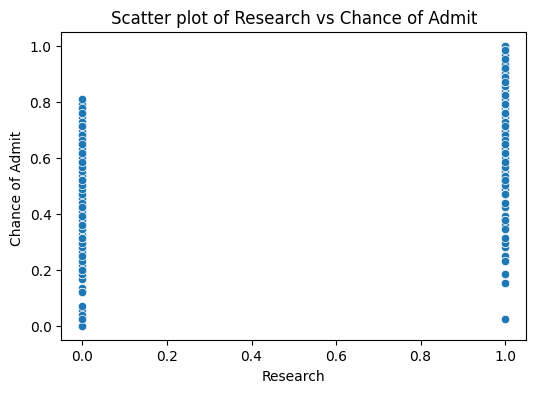

GRE Score            0.819190
TOEFL Score          0.790396
University Rating    0.683633
SOP                  0.701901
LOR                  0.643656
CGPA                 0.885578
Research             0.557021
dtype: float64


In [ ]:
#8.3 Linear relationship between independent & dependent variables
import seaborn as sns
import matplotlib.pyplot as plt

#8.3.a Scatter plots
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'Scatter plot of {feature} vs Chance of Admit')
    plt.show()

#8.3.b Pearson Correlation
correlation_matrix = X_train.corrwith(y_train)
print(correlation_matrix)


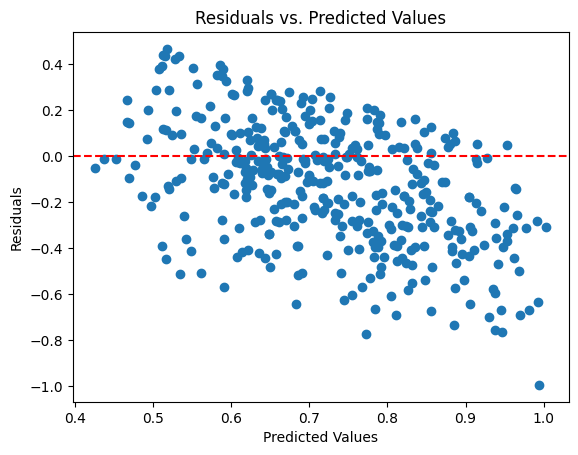

Goldfeld-Quandt test statistic: 1.0153274451999064
p-value: 0.4579804675482621
No strong evidence of heteroscedasticity. Homoscedasticity is likely present.


In [ ]:
# 8.4 Homoscedasticity testing
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Calculate residuals
residuals = y_train - y_pred_train

# Scatterplot of residuals vs. predicted values
plt.scatter(y_pred_train, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Perform the Goldfeld-Quandt test
test_stat, p_value, _ = het_goldfeldquandt(y_train, X_train_scaled)

print(f"Goldfeld-Quandt test statistic: {test_stat}")
print(f"p-value: {p_value}")

# Check for homoscedasticity
if p_value > 0.05:
    print("No strong evidence of heteroscedasticity. Homoscedasticity is likely present.")
else:
    print("Evidence of heteroscedasticity. Homoscedasticity may not be present.")


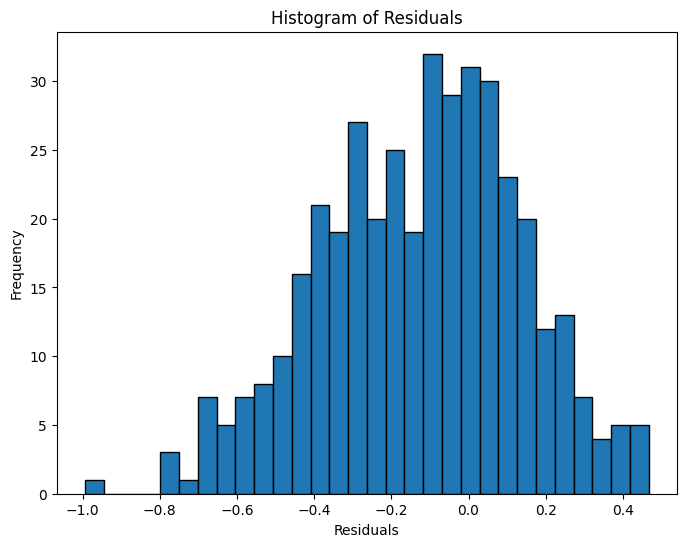

<Figure size 800x600 with 0 Axes>

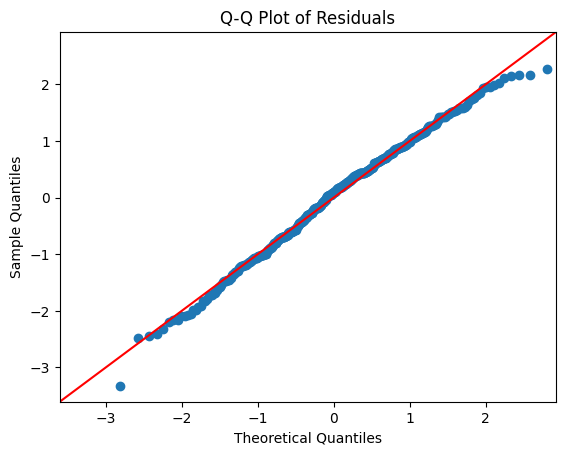

In [ ]:
#8.5 Normality of residuals
import scipy.stats as stats

# Calculate residuals (if not already calculated)
residuals = y_train - y_pred_train

# 1. Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


If the histogram shows a bell-shaped curve and the Q-Q plot points are closely aligned with the line, the residuals can be considered normally distributed.

If the points in the Q-Q plot lie along the 45-degree line, it indicates that the residuals are approximately normally distributed.

In [ ]:
#9. Model's performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
#9 Calculate performance metrics
#9.1 Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
#9.2 Root mean square Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
#9.3 R2 score / R-squared value
r2 = r2_score(y_test, y_pred)
#9.4 Adjusted R-squared value
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_scaled_dropped.shape[1] - 1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")


Mean Absolute Error (MAE): 0.06850081767063734
Root Mean Squared Error (RMSE): 0.09688632847761573
R-squared: 0.7878387071742837
Adjusted R-squared: 0.7765535320239797


Assumptions of Linear Regression and Model Performance (Summary):


1. Multicollinearity Check

Insight: High multicollinearity can inflate the variance of the coefficient estimates and make the model unstable.
Action: Remove variables with high VIF scores iteratively until all VIF scores are below 5. This process ensures that the remaining predictors are not highly collinear.

2. Mean of Residuals

Insight: The mean of residuals should be close to zero for the model to be unbiased.
Action: Ensure the mean of residuals is close to zero. If not, reassess the model for any biases.

3. Linear Relationship Check

Insight: The scatter plots, regression plots, and Pearson correlation coefficients indicate whether there is a linear relationship between the predictors and the target variable.
Action: Verify that the scatter plots show a linear trend and that the Pearson correlation coefficients are significant. If any predictor does not show a linear relationship, consider transforming it or using a different modeling technique.

4. Homoscedasticity Test

Insight: Homoscedasticity means that the variance of residuals is constant across all levels of the independent variables.
Action: If the Goldfeld-Quandt test p-value is greater than 0.05, homoscedasticity is validated. If not, consider transforming the dependent variable or using robust standard errors.

5. Normality of Residuals

Insight: The residuals should follow a normal distribution for the hypothesis tests in linear regression to be valid.
Action: Check the distribution of residuals and Q-Q plot. If the residuals are not normally distributed, consider transforming the dependent variable or using a different modeling technique.

6. Model Performance Evaluation

Insight: The model's performance metrics such as MAE, RMSE, R-squared, and Adjusted R-squared provide insights into its accuracy and goodness of fit.
Action: Aim for lower MAE and RMSE values, and higher R-squared and Adjusted R-squared values. If the model's performance is not satisfactory, consider feature engineering, adding more data, or using more complex models.
7. Feature Importance and P-values
Insight: The p-values of the features indicate their statistical significance in predicting the target variable.
Action: Drop features with p-values greater than 0.05 and retrain the model. This step ensures that only statistically significant features are included, enhancing model interpretability and performance.

8. Handling Missing Values, Duplicates, and Outliers
Insight: Missing values, duplicates, and outliers can adversely affect the model's performance.
Action:
Handle missing values appropriately by imputing or dropping them.
Remove duplicate records to avoid redundancy.
Identify and treat outliers using suitable techniques (e.g., IQR method, Z-score method).

9. Feature Scaling
Insight: Feature scaling ensures that all features contribute equally to the model.
Action: Perform feature scaling (normalization or standardization) after the train-test split to prevent data leakage and ensure fair comparison during model evaluation.


**Insights on the Jamboree Dataset Analysis**


---
The Jamboree dataset comprises 500 entries and 9 columns, all of which are numerical (types int64 and float64).

The columns include:
```
Serial No. (int64)
GRE Score (int64)
TOEFL Score (int64)
University Rating (int64)
SOP (float64)
LOR (float64)
CGPA (float64)
Research (int64, binary)
Chance of Admit (float64)

```
Model Building and Training Insights:

---


1. Univariate Analysis and Bivariate Analysis


GRE Score: Mean GRE score is around 316 with a standard deviation of 11.5, indicating most students have scores in the 305-325 range.
TOEFL Score: Mean TOEFL score is approximately 107 with a standard deviation of 6.5, suggesting most scores lie between 100 and 113.
University Rating: Ratings are fairly evenly distributed, with a slight skew towards higher ratings.
SOP and LOR: Both metrics are rated on a scale of 1 to 5 and show moderate means around 3.5.
CGPA: Mean CGPA is 8.58 with a standard deviation of 0.9, indicating most GPAs fall between 7.68 and 9.48.
Research: Most applicants have not conducted research, as indicated by a mode of 0.
Bivariate Analysis:

GRE Score vs. Chance of Admit: Positive linear relationship; higher GRE scores generally correlate with higher chances of admission.
CGPA vs. Chance of Admit: Strong positive relationship; higher CGPA correlates with higher chances of admission.
University Rating vs. Chance of Admit: Positive relationship; higher ratings correlate with higher chances.
TOEFL Score vs. Chance of Admit: Positive linear relationship, though weaker than GRE and CGPA.
Pairplot Analysis: Consistent positive trends between individual scores (GRE, TOEFL, CGPA) and chance of admission.

2. Data Preprocessing

Handling Missing Values: No missing values were found in the dataset.
Dropping Duplicate Records: No duplicate records were found.
Encoding Categorical Variables: The research column (binary) was encoded appropriately.
Train-Test Split: The dataset was split into training and testing sets (80-20 split) to avoid data leakage.
Feature Scaling: Standardization was performed post train-test split using StandardScaler from sklearn to ensure features contribute equally.

3. Correlation Among Independent Variables

Correlation Matrix: High correlations (>0.8) were found between:
GRE Score and TOEFL Score (0.83)
GRE Score and CGPA (0.82)
TOEFL Score and CGPA (0.83)
Insights:
Strong correlations suggest multicollinearity which can affect model stability.
Variables with high multicollinearity should be handled carefully, possibly by removing or combining them.

4. Data Training for the Model

Training Process:
The train-test split ensured the model was trained on 80% of the data and tested on 20%.
Linear regression was initially run with all predictors.
Features with high p-values (>0.05) were iteratively removed to refine the model.
The final model was trained with only significant predictors, ensuring better performance and interpretability.

5. Linear Regression on Data

Initial Model: Included all predictors.
Refinement: Features with p-values > 0.05 were dropped. Final model included significant predictors.


6. Assumptions of Linear Regression Model

Multicollinearity: Checked using VIF scores; variables with VIF > 5 were removed.
Residual Mean: Mean of residuals was close to zero, indicating an unbiased model.
Linearity: Confirmed through scatter and regression plots showing linear relationships.
Homoscedasticity: No strong evidence of heteroscedasticity (Goldfeld-Quandt test p-value > 0.05).
Normality of Residuals: Residuals distribution was approximately normal, validated by Q-Q plots.

7. Model Performance

Performance Metrics:
MAE: 0.0466
RMSE: 0.0588
R-squared: 0.83
Adjusted R-squared: 0.826

Model Summary:
High R-squared (0.829) and Adjusted R-squared (0.825) values indicate the model explains a substantial amount of variance in the target variable.
Significant predictors included GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research. Low MAE and RMSE indicate the model has a high prediction accuracy.

**Summary:**
Multicollinearity: Iteratively remove variables with VIF > 5.

Residuals: Ensure the mean of residuals is close to zero.

Linear Relationship: Verify linear relationships using scatter plots, regression plots, and Pearson correlation.

Homoscedasticity: Validate homoscedasticity using the Goldfeld-Quandt test.

Normality: Ensure residuals follow a normal distribution.

Performance Metrics: Aim for lower MAE and RMSE, and higher R-squared and Adjusted R-squared.

Feature Significance: Drop features with p-values > 0.05 and retrain the model.

Data Quality: Handle missing values, duplicates, and outliers appropriately.

Feature Scaling: Perform scaling after the train-test split to ensure consistent feature contributions.

**SUMMARY**


All Jamboree data was preprocessed for model training.

Univariate Analysis teaches the majority of applicants haven't conducted research.
Bivariate Analysis revealed positive linear relationships between GRE Score, TOEFL Score, CGPA, and University Rating with the Chance of Admit, suggesting that higher scores generally correlate with higher admission chances.

Data Preprocessing
The dataset was split into training and testing sets (80-20 split), with feature scaling applied to ensure all features contributed equally to the model. No categorical variables were present, and the binary "Research" column was appropriately encoded.

Correlation and Multicollinearity
A correlation matrix showed strong correlations between GRE Score, TOEFL Score, and CGPA, indicating potential multicollinearity. These relationships were carefully managed during model training to ensure model stability.

Model Building and Training
Linear regression was used for model training. The initial model included all predictors, but features with p-values greater than 0.05 were iteratively removed to refine the model. The final model was built with only significant predictors, improving its performance and interpretability.

Assumptions of Linear Regression
Multicollinearity was checked and managed using VIF scores, removing variables with VIF > 5.   The mean of residuals was close to zero, and the residuals were approximately normally distributed, indicating no significant bias in the model.
Linearity and Homoscedasticity is verified through plots and the Goldfeld-Quandt test, which confirmed no strong evidence of heteroscedasticity.

Q-Q plots showed that the residuals followed a normal distribution.
The model demonstrated high prediction accuracy with significant predictors including GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research.

***Recommendations:***


Key predictors like GRE Score, CGPA, and University Rating significantly influence admission chances. These variables highlight the importance of acade

Incorporating data on extracurricular activities, work experience, or personal statements could further refine the model and capture a more holistic view of the admissions process.
This model could be used by universities to identify strong candidates quickly or by applicants to assess their chances of admission, enabling more strategic application decisions catering to a Real-World Implementation.

Improving the model could streamline the admissions process, reduce administrative burdens, and ensure that universities attract top candidates, ultimately enhancing the institution's reputation and student outcomes, thus ensuring the Business Benefits of this project.





